# The groupby operation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
pd.options.display.max_rows = 10

I've provided the reviews by the top 100 reviewers.
We'll use it for talking about groupby.

In [4]:
df = pd.read_csv("data/subset.csv.gz", compression="gzip",
                 parse_dates=['time'])
df.head()

,abv,beer_id,brewer_id,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,profile_name,review_taste,text,time
0,5.3,93,33,Steel Rail Extra Pale Ale,American Pale Ale (APA),3.5,3.5,4.0,4.0,Todd,4.0,"Presentation: Pint size, on tap from the Easts...",1996-08-22 00:00:01
1,17.5,111,35,Samuel Adams Triple Bock,American Strong Ale,3.0,4.0,4.0,4.5,Todd,4.5,Presentation: 8.45oz blue bottle with gold let...,1998-01-10 00:00:01
2,NaN,110,35,Samuel Adams Cream Ale,Cream Ale,4.5,4.0,4.5,4.0,Jason,4.5,Presentation: Pint. On tap at the Samuel Adams...,1998-01-28 00:00:01
3,5.2,148,45,Brooklyn Lager,American Amber / Red Lager,3.0,2.5,4.0,3.5,Todd,3.5,Presentation: 12 oz. brown bottle with a clear...,1998-02-11 00:00:01
4,5.6,325,100,McNeill's Firehouse Amber Ale,American Amber / Red Ale,3.5,3.5,4.0,3.5,Todd,4.0,Presentation: An old picture of firehouse with...,1998-02-14 00:00:01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 13 columns):
abv                  68126 non-null float64
beer_id              76014 non-null int64
brewer_id            76014 non-null int64
beer_name            76014 non-null object
beer_style           76014 non-null object
review_appearance    76014 non-null float64
review_aroma         76014 non-null float64
review_overall       76014 non-null float64
review_palate        76014 non-null float64
profile_name         76014 non-null object
review_taste         76014 non-null float64
text                 76014 non-null object
time                 76014 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 7.5+ MB


## Aside: Namespaces

Pandas has been expanding its use of namespaces (or accessors) on `DataFrame` to group together related methods. This also limits the number of methods direclty attached to `DataFrame` itself, which can be overwhelming.

Currently, we have these namespaces:

- `.str`: defined on `Series` and `Index`es containing strings (object dtype)
- `.dt`: defined on `Series` with `datetime` or `timedelta` dtype
- `.cat`: defined on `Series` and `Indexes` with `category` dtype
- `.plot`: defined on `Series` and `DataFrames`

<div class="alert alert-success" data-title="Reviews by Hour">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise: Reviews by Hour</h1>
</div>

<p>Make a barplot of the count of reviews by hour of the day.</p>

- Hint: Use the `.dt` namespace to get the `hour` component of a `datetime`
- Hint: We've seen `Series.value_counts` for getting the count of each value
- Hint: Use `.sort_index` to make sure the data is ordered by hour, not count
- Hint: Use the [`.plot`](http://pandas.pydata.org/pandas-docs/stable/api.html#plotting) namespace to get a `bar` chart

In [6]:
# %load solutions/groupby_03.py
# Make a barplot of review times by hour
(df.time.dt.hour
   .value_counts()
   .sort_index()
   .plot.bar(rot=0, color='k', width=.8));


<div class="alert alert-success" data-title="Pale Ales">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise: Pale Ales</h1>
</div>
<p>
Make a variable `pale_ales` that filters `df` to just rows where `beer_style` contains the string `'pale ale'` (ignoring case)
</p>
- Hint: Use the `df.beer_style.str` namespace and find a method for checking whether a string contains another string.

In [7]:
# %load solutions/groupby_04.py
pas = df[df.beer_style.str.lower().str.contains("pale ale")]
pas.head()

# Groupby

Groupby operations come up in a lot of contexts.
At its root, groupby about doing an operation on many subsets of the data, each of which shares something in common.
The components of a groupby operation are:

## Components of a groupby

1. **split** a table into groups
2. **apply** a function to each group
3. **combine** the results into a single DataFrame or Series

In pandas the `split` step looks like

```python
df.groupby( grouper )
```

`grouper` can be many things

- Series (or string indicating a column in `df`)
- function (to be applied on the index)
- dict : groups by *values*
- `levels=[ names of levels in a MultiIndex ]`

## Split

Break a table into smaller logical tables according to some rule

In [8]:
gr = df.groupby("beer_name")
gr

We haven't really done any actual work yet, but pandas knows what it needs to know to break the larger `df` into many smaller pieces, one for each distinct `beer_name`.

## Apply & Combine

To finish the groupby, we apply a method to the groupby object.

In [9]:
review_cols = ['review_appearance', 'review_aroma', 'review_overall',
               'review_palate', 'review_taste']

df.groupby('beer_name')[review_cols].agg('mean')

,review_appearance,review_aroma,review_overall,review_palate,review_taste
beer_name,,,,,
"""50"" Golden Anniversary Lager",5.000000,3.500000,4.000000,3.500000,3.500000
"""Alt""ered State",4.000000,3.750000,3.500000,4.000000,4.000000
"""Double Wrecked Wreck"" IPA",3.250000,3.750000,4.000000,4.000000,3.750000
"""Marnie"" Gras Carnival Ale",3.666667,4.333333,3.833333,4.000000,4.000000
"""Old Yeltsin"" Imperial Stout",4.176471,4.088235,3.676471,3.882353,3.970588
...,...,...,...,...,...
Öko Ur-Weizen,3.750000,4.000000,3.500000,3.250000,3.500000
Öko Urtrunk,4.000000,4.000000,4.500000,4.000000,4.000000
Ölsch,4.000000,4.000000,4.500000,4.000000,4.500000


In this case, the function we applied was `'mean'`.
Pandas has implemented cythonized versions of certain common methods like mean, sum, etc.
You can also pass in regular functions like `np.mean`.

In terms of split, apply, combine, split was `df.groupby('beer_name')`. 
We apply the `mean` function by passing in `'mean'`.
Finally, by using the `.agg` method (for aggregate) we tell pandas to combine the results with one output row per group.

You can also pass in regular functions like `np.mean`.

In [10]:
df.groupby('beer_name')[review_cols].agg(np.mean).head()

,review_appearance,review_aroma,review_overall,review_palate,review_taste
beer_name,,,,,
"""50"" Golden Anniversary Lager",5.000000,3.500000,4.000000,3.500000,3.500000
"""Alt""ered State",4.000000,3.750000,3.500000,4.000000,4.000000
"""Double Wrecked Wreck"" IPA",3.250000,3.750000,4.000000,4.000000,3.750000
"""Marnie"" Gras Carnival Ale",3.666667,4.333333,3.833333,4.000000,4.000000
"""Old Yeltsin"" Imperial Stout",4.176471,4.088235,3.676471,3.882353,3.970588


Finally, [certain methods](http://pandas.pydata.org/pandas-docs/stable/api.html#id35) have been attached to `Groupby` objects.

In [11]:
df.groupby('beer_name')[review_cols].mean()

,review_appearance,review_aroma,review_overall,review_palate,review_taste
beer_name,,,,,
"""50"" Golden Anniversary Lager",5.000000,3.500000,4.000000,3.500000,3.500000
"""Alt""ered State",4.000000,3.750000,3.500000,4.000000,4.000000
"""Double Wrecked Wreck"" IPA",3.250000,3.750000,4.000000,4.000000,3.750000
"""Marnie"" Gras Carnival Ale",3.666667,4.333333,3.833333,4.000000,4.000000
"""Old Yeltsin"" Imperial Stout",4.176471,4.088235,3.676471,3.882353,3.970588
...,...,...,...,...,...
Öko Ur-Weizen,3.750000,4.000000,3.500000,3.250000,3.500000
Öko Urtrunk,4.000000,4.000000,4.500000,4.000000,4.000000
Ölsch,4.000000,4.000000,4.500000,4.000000,4.500000


<div class="alert alert-success" data-title="Highest Variance">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise: Highest Variance</h1>
</div>

<p>Find the `beer_style`s with the greatest variance in `abv`.</p>

- hint: `.std` calculates the standard deviation (`.var` for variance), and is available on `GroupBy` objects like `gr.abv`.
- hint: use `.sort_values` to sort a Series by the values (it took us a while to come up with that name)

In [12]:
df.groupby(by='beer_style')['abv'].agg('var').sort_values(ascending=False)

beer_style
American Double / Imperial Stout    13.696583
American Strong Ale                 10.459941
Braggot                              6.856215
American Double / Imperial IPA       4.450049
Old Ale                              4.136272
                                      ...    
Bière de Champagne / Bière Brut      0.055477
Roggenbier                           0.055074
Japanese Rice Lager                  0.028082
Gose                                 0.005333
American Black Ale                   0.000000
Name: abv, Length: 103, dtype: float64

In [13]:
# %load solutions/groupby_abv.py
df.groupby('beer_style').abv.std().sort_values(ascending=False)

beer_style
American Double / Imperial Stout    3.700889
American Strong Ale                 3.234183
Braggot                             2.618438
American Double / Imperial IPA      2.109514
Old Ale                             2.033783
                                      ...   
Bière de Champagne / Bière Brut     0.235535
Roggenbier                          0.234678
Japanese Rice Lager                 0.167577
Gose                                0.073030
American Black Ale                  0.000000
Name: abv, Length: 103, dtype: float64

## `.agg` output shape

The output shape is determined by the grouper, data, and aggregation

- Grouper: Controls the output index
    * single grouper -> Index
    * array-like grouper -> MultiIndex
- Subject (Groupee): Controls the output data values
    * single column -> Series (or DataFrame if multiple aggregations)
    * multiple columns -> DataFrame
- Aggregation: Controls the output columns
    * single aggfunc -> Index in the colums
    * multiple aggfuncs -> MultiIndex in the columns (Or 1-D Index if groupee is 1-D)


We'll go into MultiIndexes in a bit, but for know, think of them as regular Indexes with multiple levels (columns).

In [14]:
# single grouper, single groupee, single aggregation
df.groupby('beer_style').review_overall.agg('mean')

beer_style
Altbier                       3.844017
American Adjunct Lager        2.708166
American Amber / Red Ale      3.741607
American Amber / Red Lager    3.455166
American Barleywine           4.005499
                                ...   
Vienna Lager                  3.697218
Weizenbock                    4.040816
Wheatwine                     4.013514
Winter Warmer                 3.792023
Witbier                       3.886922
Name: review_overall, Length: 103, dtype: float64

In [15]:
# multiple groupers, multiple groupee, single aggregation
df.groupby(['brewer_id', 'beer_name'])[review_cols].agg(['mean', 'min', 'max', 'std', 'count'])

review_appearance                      \
                                                  mean  min  max       std   
brewer_id beer_name                                                          
1         Eisbrau Czech                       3.000000  3.0  3.0       NaN   
          Gambrinus                           4.000000  3.5  4.5  0.707107   
          Gambrinus Pale                      3.500000  3.5  3.5       NaN   
          Pilsner Urquell                     3.746575  2.0  5.0  0.507741   
          Primus                              3.000000  3.0  3.0       NaN   
...                                                ...  ...  ...       ...   
24926     Mongozo (Banana)                    4.500000  4.0  5.0  0.408248   
          Mongozo (Palmnut)                   3.894737  2.5  5.0  0.591114   
24964     Haffenreffer Private Stock          3.071429  2.0  4.0  0.786796   
26715     Gageleer                            5.000000  5.0  5.0       NaN   
27039     Heady Topper                        4.333333  4.0  4.5  0.288675   

                                           review_aroma                      \
                                     count         mean  min  max       std   
brewer_id beer_name                                                           
1         Eisbrau Czech                  1     3.000000  3.0  3.0       NaN   
          Gambrinus                      2     4.000000  4.0  4.0  0.000000   
          Gambrinus Pale                 1     3.500000  3.5  3.5       NaN   
          Pilsner Urquell               73     3.383562  1.0  5.0  0.770644   
          Primus                         1     3.500000  3.5  3.5       NaN   
...                                    ...          ...  ...  ...       ...   
24926     Mongozo (Banana)               4     4.625000  4.5  5.0  0.250000   
          Mongozo (Palmnut)             19     3.868421  3.0  5.0  0.466729   
24964     Haffenreffer Private Stock     7     3.000000  2.0  3.5  0.577350   
26715     Gageleer                       1     3.500000  3.5  3.5       NaN   
27039     Heady Topper                   3     4.500000  4.0  5.0  0.500000   

                                            ...  review_palate            \
                                     count  ...           mean  min  max   
brewer_id beer_name                         ...                            
1         Eisbrau Czech                  1  ...       3.500000  3.5  3.5   
          Gambrinus                      2  ...       3.750000  3.0  4.5   
          Gambrinus Pale                 1  ...       3.500000  3.5  3.5   
          Pilsner Urquell               73  ...       3.513699  1.0  5.0   
          Primus                         1  ...       3.000000  3.0  3.0   
...                                    ...  ...            ...  ...  ...   
24926     Mongozo (Banana)               4  ...       3.250000  2.5  4.0   
          Mongozo (Palmnut)             19  ...       3.868421  2.5  4.5   
24964     Haffenreffer Private Stock     7  ...       3.142857  1.5  4.0   
26715     Gageleer                       1  ...       3.500000  3.5  3.5   
27039     Heady Topper                   3  ...       4.666667  4.0  5.0   

                                                     review_taste            \
                                           std count         mean  min  max   
brewer_id beer_name                                                           
1         Eisbrau Czech                    NaN     1     3.500000  3.5  3.5   
          Gambrinus                   1.060660     2     4.000000  4.0  4.0   
          Gambrinus Pale                   NaN     1     3.500000  3.5  3.5   
          Pilsner Urquell             0.676863    73     3.547945  1.0  4.5   
          Primus                           NaN     1     3.000000  3.0  3.0   
...                                        ...   ...          ...  ...  ...   
24926     Mongozo (Banana)            0.645497     4     3.87

<div class="alert alert-success" data-title="Rating by length">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise: Rating by length</h1>
</div>

<p>Plot the relationship between review length (number of characters) and average `review_overall`.</p>

- Hint: use `.plot(style='k.')`
- We've grouped by columns so far, you can also group by any series with the same length

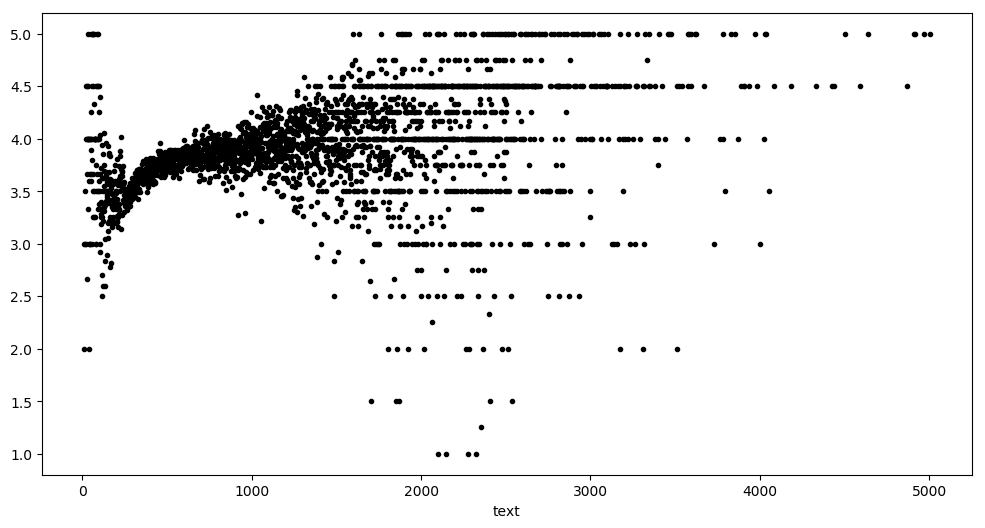

In [16]:
# %load solutions/groupby_00.py
review_length = df.text.str.len()
gr = df.groupby(review_length).review_overall
gr.mean().plot(style='k.')

<div class="alert alert-success" data-title="Reviews by Length">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise: Reviews by Length</h1>
</div>

<p>Find the relationship between review length (number of **words** and average `review_overall`.)</p>

- Hint: You can pass a [regular expression](https://docs.python.org/3/howto/regex.html#matching-characters) to any of the `.str` methods.

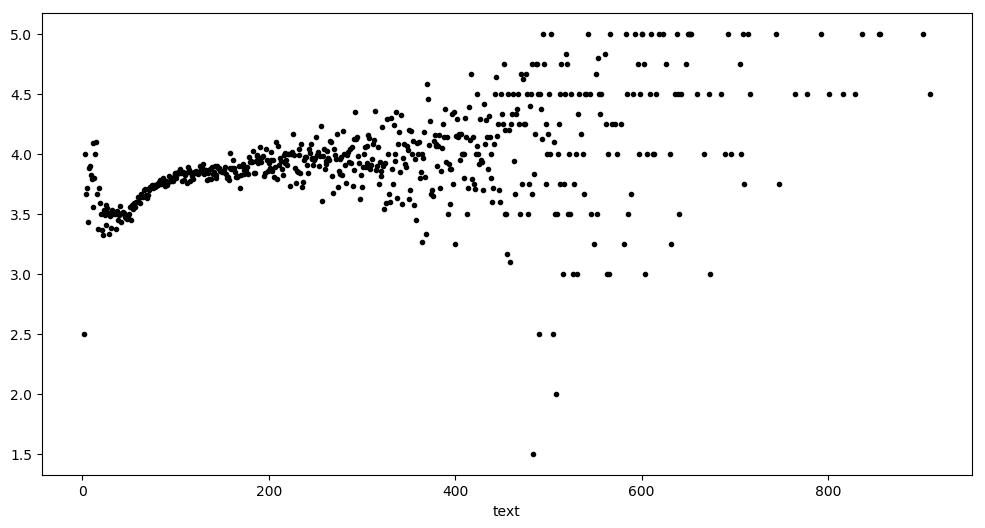

In [17]:
# %load solutions/groupby_00b.py
(df.groupby(df.text.str.count('\w+'))
   .review_overall
   .mean().plot(style='k.'))


<div class="alert alert-success" data-title="Rating by number of Reviews">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise: Rating by number of Reviews</h1>
</div>

<p>Find the relationship between the number of reviews for a beer and the average `review_overall`.</p>


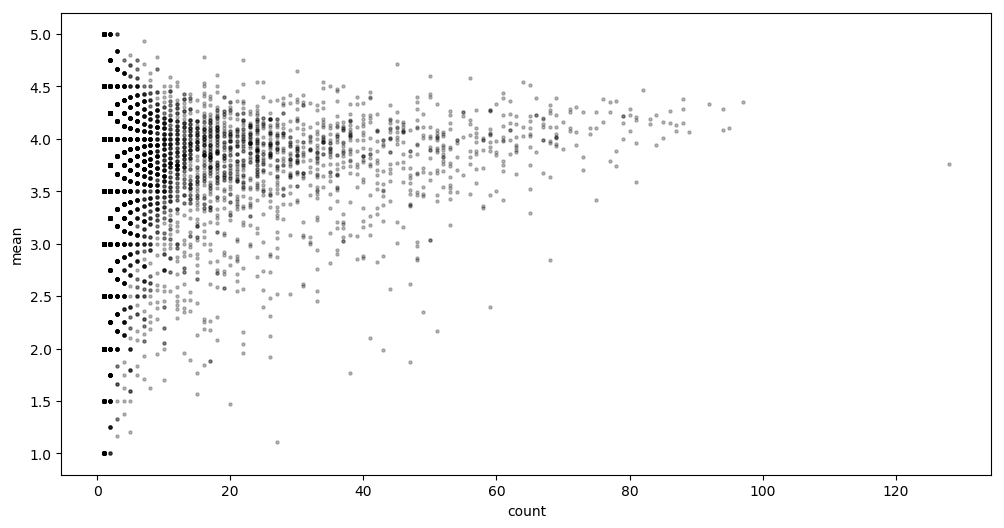

In [18]:
# %load solutions/groupby_01.py
(df.groupby('beer_id')
   .review_overall
   .agg(['mean', 'count'])
   .plot.scatter(x='count', y='mean', color='k',
                 marker='.', alpha=.25));


## Transform

A *transform* is a function whose output is the same shape as the input.

Recall that a groupby has three steps: split, apply, combine.
So far, all of the functions we've applied have been *aggregations*: the rule for "combine" is one row per group.

You can use `Groupby.transform` when you have an operation that should be done *groupwise*, but the result should be the same shape.
For example, suppose we wanted to normalize each reviewer's scores by their average score. 

In [19]:
# Define demean(v: array) -> array
def demean(v):
    return v - v.mean()

Just calling `demean` on the entire Series will normalize by the *global* average.

In [20]:
demean(df.review_overall)

0        0.245731
1        0.245731
2        0.745731
3        0.245731
4        0.245731
           ...   
76009    0.245731
76010    0.745731
76011    1.245731
76012    0.745731
76013   -0.254269
Name: review_overall, Length: 76014, dtype: float64

Now, let's demean each individual's reviews by their own average.
This could be useful if, for example, you were building a recommendation system.
A rating of 4 from someone's whose average is 2 is in some sense more meaningful that a 4 from someone who always gives 4s.

In [21]:
normalized = df.groupby("profile_name")[review_cols].transform(demean)
normalized.head()

,review_appearance,review_aroma,review_overall,review_palate,review_taste
0,-0.122437,0.003016,0.231604,0.389023,0.278649
1,-0.622437,0.503016,0.231604,0.889023,0.778649
2,0.755879,0.357983,0.710705,0.068379,0.758663
3,-0.622437,-0.996984,0.231604,-0.110977,-0.221351
4,-0.122437,0.003016,0.231604,-0.110977,0.278649


We used `.transform` because the desired output was the same shape as the input.
Just like `.agg` informs pandas that you want `1 input group → 1 output row`, the `.transform` method informs pandas that you want `1 input row → 1 output row`.

`.transform` operates on each column independently.

<div class="alert alert-success" data-title="Personal Trend?">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise: Personal Trend?</h1>
</div>

<p>Do reviewer's `review_overall` trend over a person's time reviewing?</p>

Hint: Need an indictor that tracks which review this is for that person. That is, we need a cumulative count of reviews per person.

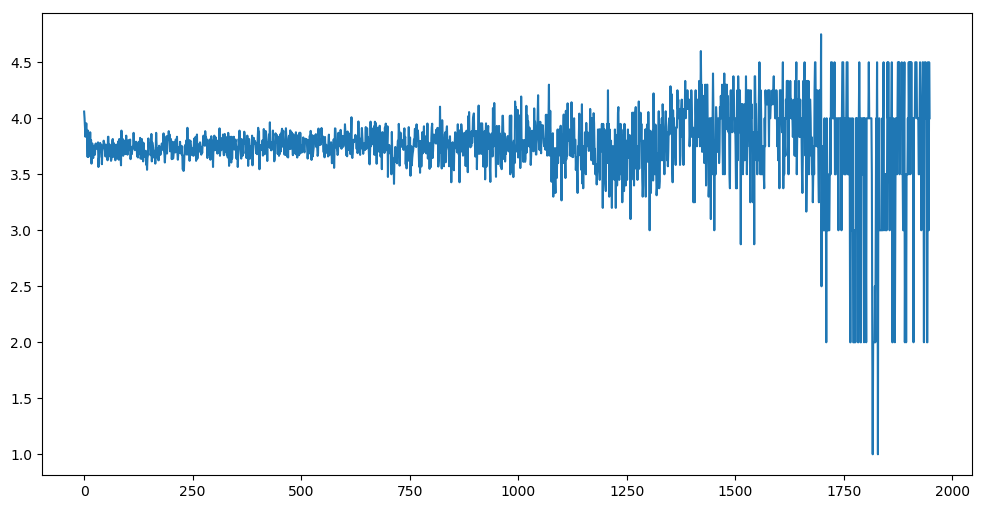

In [26]:
order = df.groupby('profile_name').review_overall.cumcount()
df.groupby(order).review_overall.mean().plot()

In [23]:
# %load solutions/groupby_02.py
order = df.groupby("profile_name").review_overall.cumcount()
df.groupby(order).review_overall.mean().plot()


## General `.apply`

We've seen `.agg` for outputting 1 row per group, and `.transform` for outputting 1 row per input row.

The final kind of function application is `.apply`.
This can do pretty much whatever you want.
We'll see an example in a later notebook.

## Summary

- We used groupby to analyze data by subsets
- We used `agg` to summarize groups and `transform` to perform group-wise transformations